In [1]:
import yaml
from violmulti.data.dataset_loader import DatasetLoader
from violmulti.data.dataset_loader import DatasetLoader

from violmulti.features.design_matrix_generator_PWM import *

import pandas as pd
import numpy as np
import ssm

from violmulti.models.ssm_glm_hmm import SSMGLMHMM
from violmulti.utils.save_load import *

%load_ext autoreload
%autoreload 2

/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Experiment Runner

### Create folder

In [33]:
from violmulti.utils.create_experiment_folder import *
from violmulti.experiments.cluster_scripts.experiment_runners import *

experiment_name = "test_runner"

In [11]:

# create_experiment_directory(experiment_name, "standard")

'/Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner'

Assumes you go to path and edit config as desired.

In [72]:
runner = ExperimentController(experiment_name)
runner.run()

[autoreload of violmulti.experiments.cluster_scripts.experiment_runners failed: Traceback (most recent call last):
  File "/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/jessbreda/an

DataLoader: Loading data for animal ids:  ['W078', 'W068']
DMG: Note more than 1 animal in dataframe!
DMG: Creating data matrix with columns: dict_keys(['s_a_stand', 's_b_stand', 'bias', 'session'])
DMG: Creating labels with column: choice.
DMG: Dropping 26123 nan rows from data and labels.
DMG: Binary encoding labels.
SaveLoad: Directory ensured at: /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/data
DataFrame saved to /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/data/animal_Ws_model_mega_glmhmm_fold_0_X.parquet
Labels saved to /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/data/animal_Ws_model_mega_glmhmm_fold_0_y.parquet
DMG: 523 sessions found and reshaped for EM.
MegaFitRunner: Data Prep Complete

MegaFitRunner: ****** Fitting init 0 ******


LP: -75316.5: 100%|██████████| 25/25 [00:20<00:00,  1.23it/s]


SaveLoad: Directory ensured at: /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/models
SaveLoad: Model saved to /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/models/animal_Ws_2_states_model_mega_glmhmm_fold_0_init_0.pkl

MegaFitRunner: ****** Fitting init 1 ******


LP: -74993.5: 100%|██████████| 25/25 [00:21<00:00,  1.19it/s]


SaveLoad: Directory ensured at: /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/models
SaveLoad: Model saved to /Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/models/animal_Ws_2_states_model_mega_glmhmm_fold_0_init_1.pkl

MegaFitRunner: Model Fit Complete


In [73]:
log_ls = np.load(
    "/Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/models/log_likelihoods.npy"
)
log_ps = np.load(
    "/Volumes/brody/jbreda/behavioral_analysis/violations_multinomial/data/results/experiment_test_runner/models/log_posteriors.npy"
)

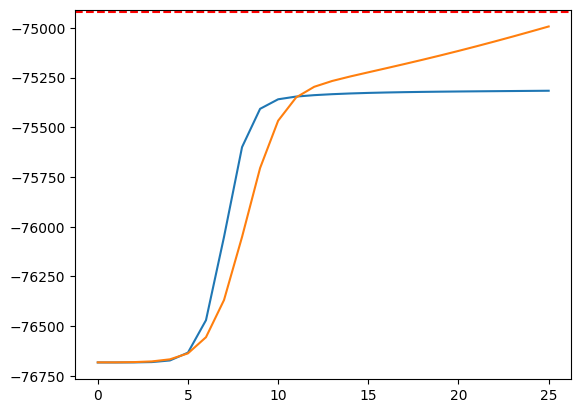

In [79]:
import matplotlib.pyplot as plt

for init in log_ps:
    plt.plot(init)

plt.axhline(np.max(log_ls), color="r", linestyle="--")

In [ ]:
# add in some Experiment Controller print statements
# use the returned log p to note which iteration is the best one

In [26]:
dir(runner)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'animal_ids',
 'config',
 'cup_data_path',
 'determine_experiment_runner',
 'dmg_config',
 'experiment_data_dir',
 'experiment_dir',
 'experiment_model_dir',
 'experiment_name',
 'experiment_runner',
 'fit_model',
 'generate_design_matrix',
 'get_experiment_dir',
 'load_format_and_unpack_config',
 'load_raw_data',
 'model_config',
 'raw_df',
 'run_experiment']

# SSM Model Class

In [2]:
# Set the parameters of the GLM-HMM
num_states = 3  # number of discrete states
obs_dim = 1  # number of observed dimensions
num_categories = 2  # number of categories for output
input_dim = 2  # input dimensions

# Make a GLM-HMM
true_glmhmm = ssm.HMM(
    num_states,
    obs_dim,
    input_dim,
    observations="input_driven_obs",
    observation_kwargs=dict(C=num_categories),
    transitions="standard",
)

gen_weights = np.array([[[6, 1]], [[2, -3]], [[2, 3]]])
gen_log_trans_mat = np.log(
    np.array([[[0.98, 0.01, 0.01], [0.05, 0.92, 0.03], [0.03, 0.03, 0.94]]])
)
true_glmhmm.observations.params = gen_weights
true_glmhmm.transitions.params = gen_log_trans_mat

In [4]:
model_config = {
    "n_states": 2,
    "n_features": 2,
    "n_categories": 2,
}


true_glmhmm = SSMGLMHMM(model_config)

num_sess = 20  # number of example sessions
num_trials_per_sess = 100  # number of trials in a session
inpts = np.ones((num_sess, num_trials_per_sess, input_dim))  # initialize inpts array
stim_vals = [-1, -0.5, -0.25, -0.125, -0.0625, 0, 0.0625, 0.125, 0.25, 0.5, 1]
inpts[:, :, 0] = np.random.choice(
    stim_vals, (num_sess, num_trials_per_sess)
)  # generate random sequence of stimuli
inpts = list(inpts)  # convert inpts to correct format
len(inpts), inpts[0].shape


true_latents, true_choices = [], []
for sess in range(num_sess):
    true_z, true_y = true_glmhmm.sample(num_trials_per_sess, input=inpts[sess])
    true_latents.append(true_z)
    true_choices.append(true_y)

len(true_latents), true_latents[0].shape

(20, (100,))

In [5]:
new_glm = SSMGLMHMM(model_config)

In [6]:
log_ps = new_glm.fit(inpts, true_choices)

Converged to LP: -1319.0:  50%|█████     | 101/200 [00:01<00:01, 53.46it/s]


In [7]:
new_glm.log_likelihood(datas=true_choices, inputs=inpts)

-1287.6542699824433

In [8]:
print(new_glm.init_state_distn.params)
print(new_glm.transitions.params)
print(new_glm.observations.params)

(array([-0.59232743, -0.8052831 ]),)
(array([[-0.10741745, -2.28426061],
       [-3.88566291, -0.02074797]]),)
[[[-0.4503473   0.50769856]]

 [[-1.18065114 -0.64465861]]]


In [9]:
save_model_to_pickle(  # tell the path
    new_glm,
    model_path="/Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/model_results",
)



SaveLoad: Directory ensured at: /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/model_results
SaveLoad: Model saved to /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/model_results/animal__2_states_model_glmhmm_fold_0_init_0.pkl


In [11]:
loaded_model = load_model_from_pickle(
    animal_id="",
    n_states=2,
    model_name="glmhmm",
    n_fold=0,
    n_init=0,
    model_path="/Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/model_results/",
)

In [11]:
loaded_model2 = load_model_from_pickle(
    animal_id="",
    n_states=2,
    model_name="glmhmm",
    n_fold=0,
    results_path="/Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/",
)

In [13]:
print(loaded_model2.init_state_distn.params)
print(loaded_model2.transitions.params)
print(loaded_model2.observations.params)

(array([-1.74610071, -0.19170891]),)
(array([[-0.01161171, -4.4615418 ],
       [-3.88070606, -0.02085215]]),)
[[[ 1.47712929  0.38278679]]

 [[-1.08570381  1.58486934]]]


# DMG Config

In [14]:
true_config = {
    "data": {
        "s_a_stand": lambda df: (standardize(df.s_a)),
        "s_b_stand": lambda df: (standardize(df.s_b)),
        "stim_avg_stand": lambda df: standardize(
            (combine_two_cols(df.s_a, df.s_b, operation="mean"))
        ),
        "prev_correct": lambda df: (
            shift_n_trials_up(df.correct_side, df.session, shift_size=1)
        ),
        "labels": binary_choice_labels(),
    }
}

true_config  # to compare the .yaml file to
config_path = "/Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/config.yaml"

In [15]:
animal_ids = ["W078"]
relative_data_path = "/Users/jessbreda/Desktop/github/violations-multinomial/data"

df = DatasetLoader(
    animal_ids=animal_ids,
    data_type="new_trained",
    relative_data_path=relative_data_path,
).load_data()

Loading data for animal ids:  ['W078']


### Testing Config Utilty Functions

In [36]:
from violmulti.utils.config_utils import *

config = load_config_from_yaml(config_path)
config["dmg_config"] = convert_dmg_config_functions(config["dmg_config"])
config

{'animal_ids': ['W078'],
 'relative_data_path': '/Users/jessbreda/Desktop/github/violations-multinomial/data',
 'data_type': 'new_trained',
 'dmg_config': {'s_a_stand': <function violmulti.utils.config_utils.<lambda>(df)>,
  's_b_stand': <function violmulti.utils.config_utils.<lambda>(df)>,
  'stim_avg_stand': <function violmulti.utils.config_utils.<lambda>(df)>,
  'prev_correct': <function violmulti.utils.config_utils.<lambda>(df)>,
  'labels': {'column_name': 'choice', 'mapping': {0: 0, 1: 1, 2: nan}}}}

In [37]:
dmg = DesignMatrixGeneratorPWM(df, config["dmg_config"], verbose=True)
X, y = dmg.create()
X.head(), y[0:5]

DMG: Creating data matrix with columns: dict_keys(['s_a_stand', 's_b_stand', 'stim_avg_stand', 'prev_correct'])
DMG: Creating labels with column: choice.
DMG: Dropping 8254 nan rows from data and labels.
DMG: Binary encoding labels.


(         s_a_stand  s_b_stand  stim_avg_stand  prev_correct
 1180811  -1.672853  -0.782846       -1.344194           0.0
 1180812  -0.036372   0.851860        0.446731           0.0
 1180813  -0.036372  -0.782846       -0.448732           0.0
 1180814  -0.854613  -1.600199       -1.344194           1.0
 1180815   0.781869   0.034507        0.446731           1.0,
 array([0, 0, 0, 0, 1]))

In [38]:
save_data_and_labels_to_parquet(X, y)

Directory ensured at: /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/data
DataFrame saved to /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/data/animal__model__fold_0_X.parquet
Labels saved to /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/data/animal__model__fold_0_y.parquet


In [39]:
X_loaded, y_loaded = load_data_and_labels_from_parquet(
    animal_id="",
    model_name="",
    n_fold=0,
    data_path=Path(
        "/Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/data"
    ),
)

here
DataFrame loaded from /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/data/animal__model__fold_0_X.parquet
Labels loaded from /Users/jessbreda/Desktop/github/violations-multinomial/src/violmulti/experiments/cluster_scripts/example_experiment/data/animal__model__fold_0_y.parquet


In [42]:
# ensure X and X_loaded are equal
assert X.equals(X_loaded)

# ensure y and y_loaded are equal
assert np.all(y == y_loaded)

### Pre config utility functions

In [139]:
def load_config_from_yaml(file_path):
    with open(file_path, "r") as file:
        config = yaml.safe_load(file)
    return config


# Example usage
config = load_config_from_yaml(config_path)
type(config), print(config)

{'data': {'s_a_stand': 'lambda df: standardize(df.s_a)', 's_b_stand': 'lambda df: standardize(df.s_b)', 'stim_avg_stand': "lambda df: standardize(combine_two_cols(df.s_a, df.s_b, operation='mean'))", 'prev_correct': 'lambda df: shift_n_trials_up(df.correct_side, df.session, shift_size=1)', 'labels': 'binary_choice_labels()'}}


(dict, None)

In [140]:
def deserialize_function_or_call(func_str):
    try:
        if "lambda" in func_str:
            return eval(func_str)
        elif "()" in func_str:  # Simple check to see if it's a function call
            return eval(func_str)
        else:
            raise ValueError(f"Unknown function format: {func_str}")
    except (SyntaxError, NameError) as e:
        raise ValueError(f"Error evaluating function string: {func_str} - {e}")


def convert_config_functions(config):
    deserialized_config = {}
    for key, func_str in config.items():
        deserialized_config[key] = deserialize_function_or_call(func_str)
    return deserialized_config

In [141]:
config  # pre-deserialization

{'data': {'s_a_stand': 'lambda df: standardize(df.s_a)',
  's_b_stand': 'lambda df: standardize(df.s_b)',
  'stim_avg_stand': "lambda df: standardize(combine_two_cols(df.s_a, df.s_b, operation='mean'))",
  'prev_correct': 'lambda df: shift_n_trials_up(df.correct_side, df.session, shift_size=1)',
  'labels': 'binary_choice_labels()'}}

In [142]:
config["dmg_config"] = convert_config_functions(config["dmg_config"])
config  # post-deserialization

{'data': {'s_a_stand': <function __main__.<lambda>(df)>,
  's_b_stand': <function __main__.<lambda>(df)>,
  'stim_avg_stand': <function __main__.<lambda>(df)>,
  'prev_correct': <function __main__.<lambda>(df)>,
  'labels': {'column_name': 'choice', 'mapping': {0: 0, 1: 1, 2: nan}}}}

In [131]:

dmg = DesignMatrixGeneratorPWM(df, config["dmg_config"], verbose=True)
X, y = dmg.create()

Loading data for animal ids:  ['W078']
DMG: Creating data matrix with columns: dict_keys(['s_a_stand', 's_b_stand', 'stim_avg_stand', 'prev_correct'])
DMG: Creating labels with column: choice.
DMG: Dropping 8254 nan rows from data and labels.
DMG: Binary encoding labels.


In [133]:
dmg2 = DesignMatrixGeneratorPWM(df, true_config["dmg_config"], verbose=True)
X_true, y_true = dmg2.create()

DMG: Creating data matrix with columns: dict_keys(['s_a_stand', 's_b_stand', 'stim_avg_stand', 'prev_correct'])
DMG: Creating labels with column: choice.
DMG: Dropping 8254 nan rows from data and labels.
DMG: Binary encoding labels.


In [119]:
X

,s_a_stand,s_b_stand,stim_avg_stand,prev_correct
1180811,-1.672853,-0.782846,-1.344194,0.0
1180812,-0.036372,0.851860,0.446731,0.0
1180813,-0.036372,-0.782846,-0.448732,0.0
1180814,-0.854613,-1.600199,-1.344194,1.0
1180815,0.781869,0.034507,0.446731,1.0
...,...,...,...,...
1261383,-0.036372,-0.782846,-0.448732,1.0
1261384,-0.854613,0.034507,-0.448732,1.0
1261385,-1.672853,-0.782846,-1.344194,0.0
1261387,-0.036372,-0.782846,-0.448732,0.0


In [120]:
X_true

,s_a_stand,s_b_stand,stim_avg_stand,prev_correct
1180811,-1.672853,-0.782846,-1.344194,0.0
1180812,-0.036372,0.851860,0.446731,0.0
1180813,-0.036372,-0.782846,-0.448732,0.0
1180814,-0.854613,-1.600199,-1.344194,1.0
1180815,0.781869,0.034507,0.446731,1.0
...,...,...,...,...
1261383,-0.036372,-0.782846,-0.448732,1.0
1261384,-0.854613,0.034507,-0.448732,1.0
1261385,-1.672853,-0.782846,-1.344194,0.0
1261387,-0.036372,-0.782846,-0.448732,0.0
